In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

LATENT_DEPTH = 100
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNEL = 3

In [3]:
loaded = tf.saved_model.load('/content/drive/MyDrive/Colab Notebooks/WGAN_GP/EXP_2/wgan_gp')
model = loaded.signatures["serving_default"]

In [4]:
def generate_images(model, latent_depth):

    plt.figure(figsize=(15,10))

    for i in range(4):
        input_ = tf.random.normal([1, latent_depth])
        images = model(input_)['generator']
        
        image = images[0, :, :, :]
        image = np.reshape(image, [IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNEL])
        image = (image+1.0)/2.0

        plt.subplot(1, 4, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Randomly Generated Images")

    plt.tight_layout()
    plt.show()

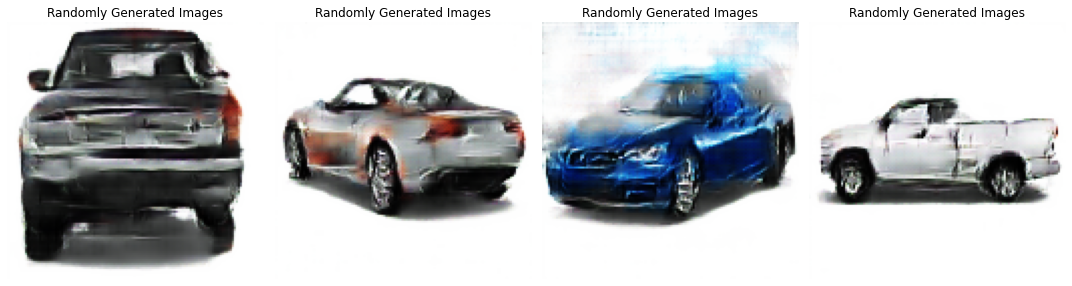

In [7]:
generate_images(model, LATENT_DEPTH)